# Graduate Rotational Internship Program : The Sparks Foundation
# Data Science & Business Analytics
# Author : Burzin N. Wadia
# Task 3 : Exploratory Data Analysis - Retail
# To perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
data3=pd.read_csv("SampleSuperstore.csv")

In [4]:
data3

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
data3.shape

(9994, 13)

In [6]:
data3.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data3.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
data3.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
data3["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [10]:
data3.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
data3["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [12]:
segment_analysis=data3["Segment"].value_counts()/len(data3["Segment"])*100


<AxesSubplot:>

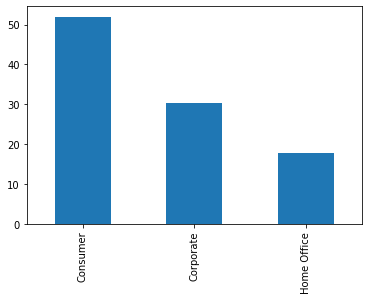

In [13]:
segment_analysis.plot(kind="bar")


In [14]:
shipmode_analysis=data3["Ship Mode"].value_counts()/len(data3["Ship Mode"])*100

<AxesSubplot:>

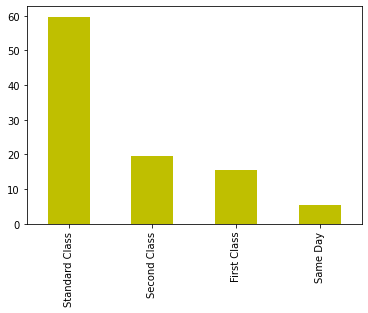

In [15]:
shipmode_analysis.plot(kind="bar", color="y")

In [16]:
category_analysis=data3["Category"].value_counts()/len(data3["Category"])*100


In [17]:
category_analysis

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

<AxesSubplot:>

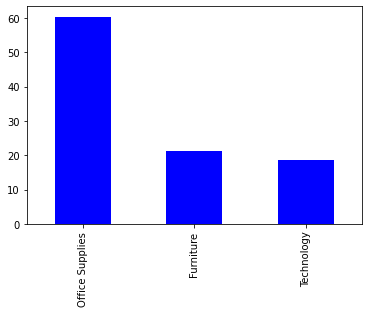

In [18]:
category_analysis.plot(kind="bar",color="b")

In [19]:
subcategory_analysis=data3["Sub-Category"].value_counts()/len(data3["Sub-Category"])*100


<AxesSubplot:>

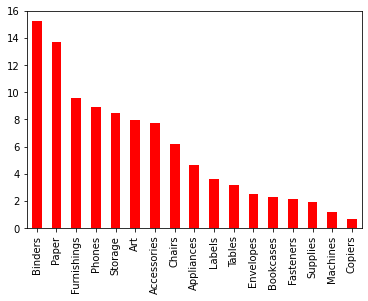

In [20]:
subcategory_analysis.plot(kind="bar",color="r")

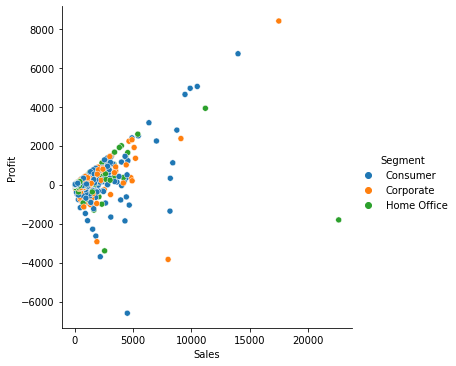

In [21]:
sns.relplot(x="Sales",y="Profit", hue="Segment", data=data3)

In [22]:
profit_discount=data3.pivot_table(index="Segment", columns="Discount", values="Profit", aggfunc="median")
profit_discount

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


In [23]:
sales_discount=data3.pivot_table(index="Segment", columns="Discount", values="Sales", aggfunc="median")
sales_discount

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


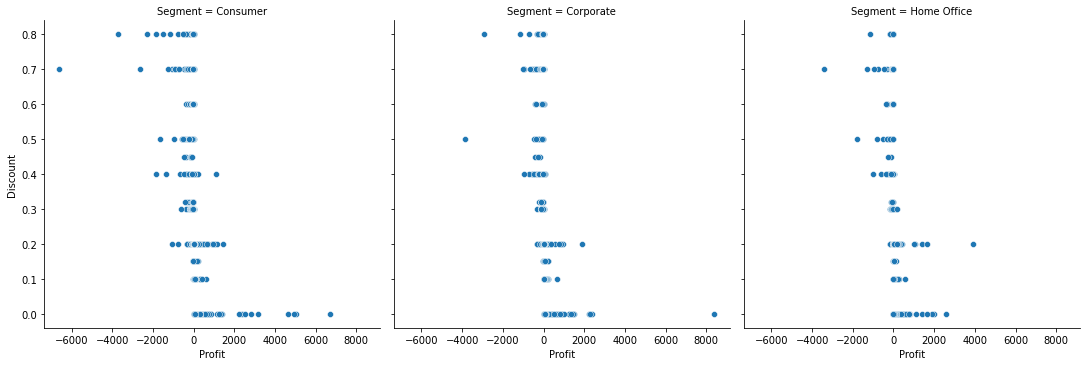

In [24]:
sns.relplot(x="Profit",y="Discount", data=data3, kind="scatter", col="Segment")

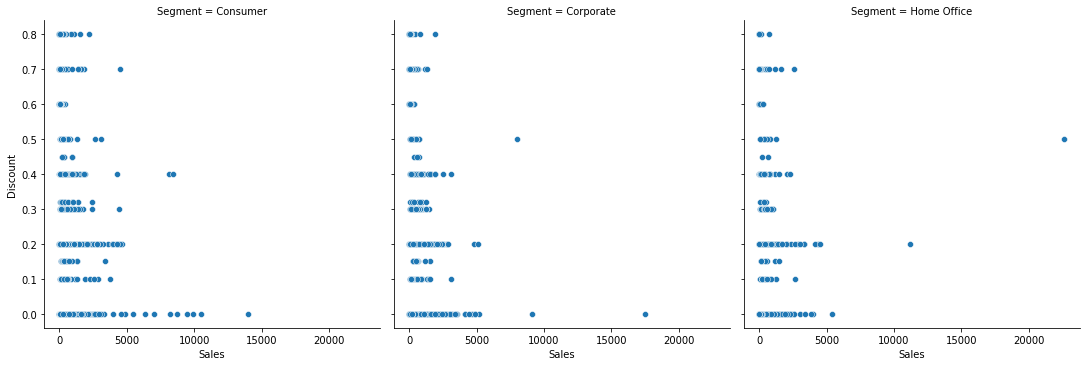

In [25]:
sns.relplot(x="Sales",y="Discount", data=data3, kind="scatter", col="Segment")

<AxesSubplot:xlabel='Segment,Discount'>

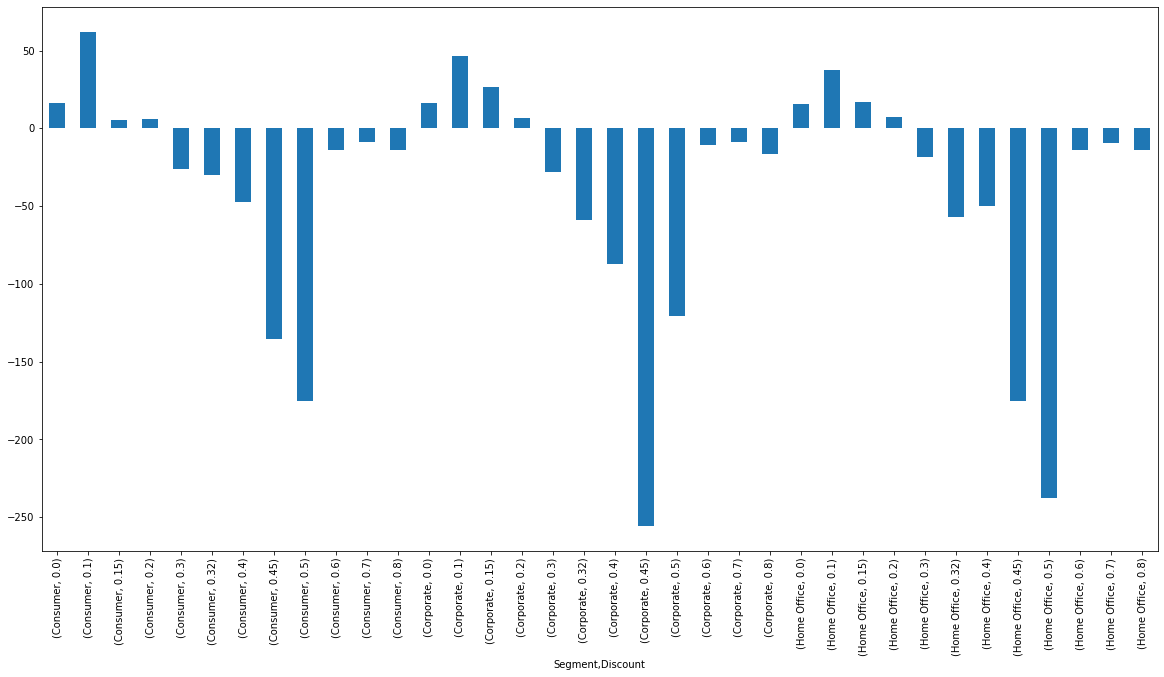

In [26]:
overall=data3.groupby(["Segment","Discount"]).Profit.median()
overall.plot(kind="bar", figsize=(20,10))